# Lid-driven cavity

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1=ib.stretching(35, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s1=np.r_[s1, 2*s1[-1]-s1[-2::-1]]
s1/=s1[-1]

s2=ib.stretching(42, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s2=np.r_[s2, 2*s2[-1]-s2[-2::-1]]
s2/=s2[-1]

solver = ib.Solver(x=s1, y=s2, iRe=1/1000, Co=0.75, fractionalStep=False)

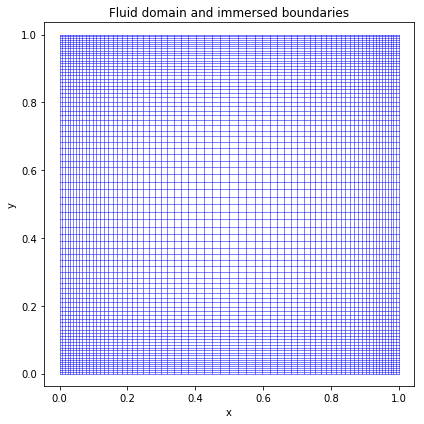

In [4]:
solver.plot_domain()

## Boundary conditions

In [5]:
fuBC = (lambda s, t: np.zeros_like(s),)*3 + (lambda s, t: np.ones_like(s),)
fvBC = (lambda s, t: np.zeros_like(s),)*4

## Unsteady simulation

In [6]:
%%time
x, t, infodict = solver.steps(solver.zero(), fuBC, fvBC, number=int(50/solver.dt), verbose=int(5/solver.dt))

       k            t          x_2       dxdt_2 
    1201  4.99877e+00  1.73847e+01  2.21625e+00 
    2402  9.99754e+00  1.93235e+01  1.15703e+00 
    3603  1.49963e+01  2.10913e+01  6.47960e-01 
    4804  1.99951e+01  2.21660e+01  2.94367e-01 
    6005  2.49938e+01  2.26735e+01  1.12408e-01 
    7206  2.99926e+01  2.28906e+01  4.26001e-02 
    8407  3.49914e+01  2.29864e+01  1.81201e-02 
    9608  3.99901e+01  2.30331e+01  9.24955e-03 
   10809  4.49889e+01  2.30586e+01  5.49222e-03 
   12010  4.99877e+01  2.30740e+01  3.55721e-03 
   12012  4.99960e+01  2.30741e+01  3.55496e-03 
CPU times: user 1h 7min 13s, sys: 1min 49s, total: 1h 9min 3s
Wall time: 2min 31s


## Display results

Plot velocity components and pressure.

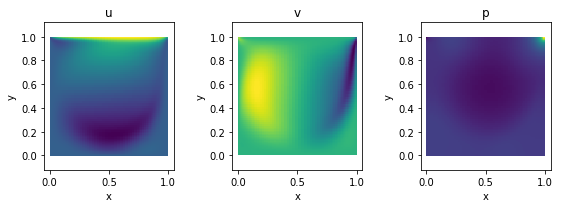

In [7]:
solver.plot_field(x, xlim=(0, 1), ylim=(0, 1))

Check results against Ghia et al. (1982)

In [8]:
ghia = np.loadtxt("101-LidDrivenCavityRe1000_Ghia.csv", skiprows=1)

In [9]:
u, v, p = solver.reshape(*solver.unpack(x))

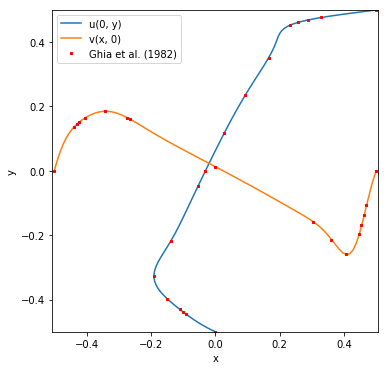

In [10]:
plt.figure(figsize=(5.5, 5.25))

ui = solver.fluid.u.shape[1]//2
uu = np.r_[fuBC[2](solver.fluid.u.x[ui], 0), u[:,ui], fuBC[3](solver.fluid.u.x[ui], 0)]
uy = np.r_[solver.fluid.y[0], solver.fluid.u.y, solver.fluid.y[-1]]
plt.plot(0.5*uu, uy-0.5, label='u(0, y)');
plt.plot(0.5*ghia[:,1], ghia[:,0]-0.5,'sr', ms=2)

vi = solver.fluid.v.shape[0]//2
vv = np.r_[fvBC[0](solver.fluid.v.x[vi], 0), v[vi,:], fvBC[1](solver.fluid.v.x[vi], 0)]
vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]
plt.plot(vx-0.5, 0.5*vv, label='v(x, 0)');
plt.plot(ghia[:,2]-0.5, 0.5*ghia[:,3],'sr', ms=2, label='Ghia et al. (1982)')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);

Plot convergence history

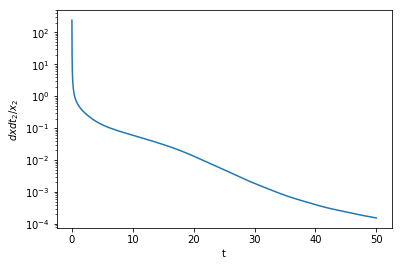

In [11]:
plt.figure()
plt.semilogy(infodict['t'], infodict['dxdt_2']/infodict['x_2'])
plt.xlabel('t')
plt.ylabel(r'$dxdt_2/x_2$');